*Project for the course in Microeconometrics, Summer 2019, Bonn Univsersity*

---

## Replication of '_Ability, Gender, and Performance Standards: Evidence from Academic Probation_' <a class="tocSkip"> 

By Jason M. Lindo, Nicholas J. Sanders & Philip Oreopoulos, *Published in 2010*



---

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as st
import matplotlib as plt

# Summary and main findings

# Causal Graphs

# Study replication

In [6]:
data = pd.read_stata('data/data_for_analysis.dta')
data.shape

(44362, 86)

## Data & Descriptive Statistics
Overview of all variables in the provided dataset:

In [7]:
columnlist = data.columns
print(columnlist)

Index(['credits1', 'credits2', 'credits_earned1', 'credits_earned2',
       'session1', 'winter_ac_standing', 'GPA_year1', 'GPA_year2',
       'CGPA_year1', 'CGPA_year2', 'totcredits_year1', 'totcredits_year2',
       'goodstanding_year1', 'goodstanding_year2', 'winter_ac_stand_year1',
       'winter_ac_stand_year2', 'fallreg_year1', 'fallreg_year2',
       'act_fallreg_year1', 'act_fallreg_year2', 'summerreg_year1',
       'summerreg_year2', 'sex', 'mtongue', 'identifier', 'age_at_entry',
       'bpl_north_america', 'bpl_asia', 'canadian', 'bpl_other', 'firstyear',
       'yearstodegree', 'gradin4', 'gradin5', 'gradin6', 'gradin4orcont',
       'cumcredits1', 'cumcredits2', 'prog_science', 'prog_socsci_bus',
       'prog_socscihum', 'prog_unknown', 'english', 'noenglish', 'french',
       'other_lang', 'female', 'male', 'gpacutoff', 'dist_from_cut',
       'year2_dist_from_cut', 'CGPA_final', 'nextGPA', 'nextCGPA',
       'probation_year1', 'probation_year2', 'probation_summer1',
    

### Data Restriction & Preperation

Lindo et al. (2010) filter the data to meet the following requirements:
* Students entered university before the year 2004 ( to ensure they can be observed over a 2-year period)
* Students are between 17 and 21 years of age at time of entry
* Distance from cutoff is maximally 0.6

In [8]:
data.firstyear.unique()

array([2002, 2001, 2000, 2003, 1996, 1998, 1997, 1999], dtype=int64)

In [9]:
data.age_at_entry.unique()

array([19., 18., 20., 17., 21.])

The dataset provided for replication is already filtered by age and year of university entrance. The distance from cutoff still spans from  values of -1.6 to 2.8 as can be seen below. I thus filter the data further to receive the sample used in the study.

(array([ 842., 1290., 2571., 4265., 6328., 7828., 8156., 6789., 4806.,
       1487.]), array([-1.6       , -1.1600001 , -0.72      , -0.28000003,  0.15999997,
        0.59999996,  1.04      ,  1.48      ,  1.92      ,  2.36      ,
        2.8       ], dtype=float32), <a list of 10 Patch objects>)


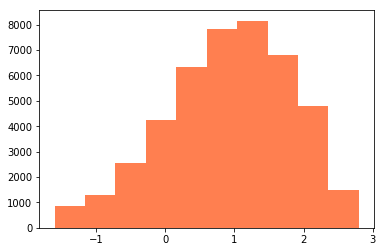

In [10]:
# Distribution of values for distance from cutoff.
print(plt.pyplot.hist(data['dist_from_cut'], color = "coral"))

In [11]:
# Reduce sample to students within 1.2 points from cutoff.
sample0 = data[abs(data['dist_from_cut']) < 1.2] 
sample0.reset_index(inplace=True)
print("A sample of students within 1.2 points from the cuttoff encompasses", sample0.shape[0], "observations.")

A sample of students within 1.2 points from the cuttoff encompasses 25389 observations.


In [12]:
# Reduce sample to students within 0.6 points from cutoff.
sample1 = data[abs(data['dist_from_cut']) < 0.6]  
sample1.reset_index(inplace=True)
print("The final sample includes", sample1.shape[0], "observations.")

The final sample includes 12530 observations.


### Table 1 – Summary Statistics

In [13]:
main = sample1[['hsgrade_pct','totcredits_year1', 'age_at_entry','male', 'english', 'bpl_north_america', 
             'loc_campus1','loc_campus2', 'loc_campus3',
             'dist_from_cut', 'probation_year1', 'probation_ever', 'left_school', 'year2_dist_from_cut',
             'suspended_ever', 'gradin4', 'gradin5', 'gradin6']]

In [14]:
table1 = pd.DataFrame()
table1['Mean'] = main.mean()
table1['Standard Deviation'] = main.std()
#table1 = table1.astype(float).round(2)
table1['Description'] = ["High School Grade Percentile", "Credits attempted first year", "Age at entry",
                         "Male", "English is first language", "Born in North America", 
                         "At Campus 1", "At Campus 2", "At Campus 3",
                         "Distance from cutoff in first year", "On probation after first year", " Ever on acad. probation",
                         "Left uni after 1st evaluation", "Distance from cutoff at next evaluation", "Ever suspended",
                         "Graduated by year  4", "Graduated by year  5", "Graduated by year  6"]
table1.loc[0:9,'Type'] = "Characteristics"
table1.loc[9:,'Type'] = "Outcomes"
table1

,Mean,Standard Deviation,Description,Type
hsgrade_pct,33.332085,23.288502,High School Grade Percentile,Characteristics
totcredits_year1,4.426975,0.530186,Credits attempted first year,Characteristics
age_at_entry,18.718756,0.735240,Age at entry,Characteristics
male,0.375180,0.484199,Male,Characteristics
english,0.718755,0.449625,English is first language,Characteristics
bpl_north_america,0.870231,0.336071,Born in North America,Characteristics
loc_campus1,0.478132,0.499548,At Campus 1,Characteristics
loc_campus2,0.209497,0.406989,At Campus 2,Characteristics
loc_campus3,0.312370,0.463482,At Campus 3,Characteristics
dist_from_cut,0.111093,0.325851,Distance from cutoff in first year,Outcomes


## Empirical Strategy

## Regression Analysis

### Tests of the Validity of the RD Approach

One of the major concerns in the application of regression discontinuity designs is **nonrandom sorting**. In Lindo et al. (2010) such troubles could arise if students just below the cutoff were to actively influence their GPAs to avoid being put on academic probabtion. 

Lindo et al. (2010) focus on _first year students_ for this reason, as they assume this group of students is likely to be less familiar with the probation poliy on campus. To support verify their conjecture, the author also conducted as survey in an introductory economic course which revealed that around 50 % of students were unsure of the probation cutoff at their campus. They also claim that this analysis showed no relationship between knowledge of probation cutoffs and student's grades. 

The authors also point out that most first year courses span the entire year and most of the evaluation takes place at the end of the term, which would make it difficult for students to purosely aim for performances slightly above the cutoff for academic probation. 

If nonrandom sorting were to be a problem nontheless, there should be a **discontinuity** in the distribution of grades at the cutoff with a disproportionate number of students scoring just above the cutoff.

In [15]:
# Create bins of size 1.0 for distance from cutoff.
sample0['bin'] = pd.cut(x=sample0['dist_from_cut'], bins=24, labels=np.arange(-1.15,1.25,0.1))
sample0[['dist_from_cut','bin']].head()

C:\Users\arohanui\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dist_from_cut,bin
0,0.45,0.45
1,0.68,0.65
2,-0.76,-0.75
3,0.84,0.85
4,0.98,0.95


In [16]:
figure1 = pd.DataFrame(sample0['bin'].value_counts())
figure1.reset_index(level=0, inplace=True)
#figure1.reset_index()
figure1.rename(columns={"index": "bin", "bin": "counts"}, inplace=True)

In [17]:
figure1.to_csv("data/figure1.csv", index=False)
figure1 = pd.read_csv('data/figure1.csv')

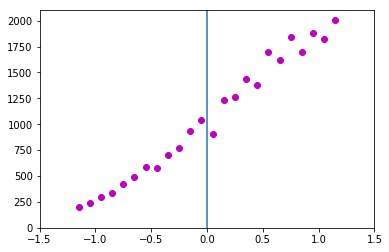

In [18]:
#plt.pyplot.plot(figure1, color = "blue")
plt.pyplot.xlim(-1.5,1.5,0.1)
plt.pyplot.ylim(0,2100)
plt.pyplot.axvline(x=0)
plt.pyplot.plot(figure1.bin,figure1.counts, "mo")


### First year GPAs and Academic Probation

# Discussion

---

# Miscellaneous

In [19]:
# Saving the variables in the data to as csv file to create a excel list with info on variables
variable_desc = pd.DataFrame({"variables": []})
for i in range(1,len(columnlist)):
    variable_desc.loc[i] = columnlist[i]
    i += 1
variable_desc.to_csv("data/variable_descriptions.csv", index=False)